In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

| Nombre del campo                  | Descripción                                                                 | Tipo de variable | Importancia Inicial | Notas 
|-----------------------------------|----------------------------------------------------------------------------|------------------|---------------------|-----------
| Fecha_hora                        | fecha y hora de los ataques                                                |categorica ordinal| importante        |                     |
| IP Origen                         | Ip origen de los ataques                                                   |numerica dis.     | target              |                    
| Destino IP                        | Ip destino de los ataques                                                  |numerica discreta |  target             |                    
| Puerto_origen                     | Puerto a traves del cual parten la Ip de los ataques                       |numérica discreta | **ELIMINADA**       | NaN        
| Puerto_destino                    | Puerto a traves del cual llegan las Ip de los ataques                      |numérica discreta | **ELIMINADA**       | NaN             
| Protocolo                         | capas de transportes IP: ICMP/UDP/TCP.                                     |categorica ordinal| **ELIMINADA**       |                    
| Longitud_paquete                  | tamaño del paquete de datos que se está transmitiendo a través de una red  |numerica discreta | **ELIMINADA**       |se expresa en Bytes 
| Tipo_paquete                      | clasificación del paquete de datos que se está transmitiendo por la red    |binaria           | **ELIMINADA**       |                    
| Tipo                              |prot. usados en redes de computadoras para realizar funciones específicas   |categórica ordinal| **ELIMINADA**       |http dns Ftp        
| Datos_carga_util                  | datos de un paquete de red necesarios para la transmisión efectiva         |categórica ordinal| Importante          |                   |
|Resultado_analisis                 | analisis a traves de cluster, con la finalidad de derectar patrones anomalo|categorica nominal| importante          | incluida por mi
|Cluster',                          |agrupar elementos similares, puede ayudar identificar patrones o anomalias  |numerica continua | importante          | incluida por mi
|Etiqueta'                          | muestra si el resultado del analisis es normal o anomalo                   |binaria           | importante          |
|Indicadores_malware               | patrones  identiicar la presencia o actividad maliciosa en la red         |categórica ordinal| | En cuenta           |              
| Puntuaciones_anomalías            | patrones que se generan mediante IAs que sobrepasan el umbral permimitido  |numérica discreta |  en cuenta          |                    
| Alertas_advertencias              | notificaciones diseñadas para informar sobre situaciones críticas          |categórica ordinal|  **ELIMINADA**       |NaN-Alert Triggered
| Tipo_ataque                       | ataque informático basada en la naturaleza, el método y los objetivos      |categórica ordinal|                     |                    
| Firma_ataque                      | patróne de características identificables asociados a un tipo ataque       |binaria           |                     |                    
| respuesta_tomada                  | acciones de seguridad en respuesta a un evento o a un ataque detectado     |categórica ordinal| **ELIMINADA**       |                    
| Nivel_severidad                   | indican la gravedad o importancia de una alerta o evento                   |categórica ordinal|                     |                    
| Informacion_usuario               | datos y detalles relacionados con un usuario en un sistema o plataforma    |categórica ordinal|                     |                    
| Informacion_dispositivo           | identificar el navegador y el S.O desde el cual se realiza una solicitud   |categórica ordinal| en cuenta           | datos navegador    
| Segmento_red                      | objetivo de mejorar la eficiencia, la seguridad y la administración - red  |categórica ordinal|  **ELIMINADA**      |                    
| Datos_geolocalización             | Ubicacion de las direcciones IP origen y destino de los ataques            |categórica ordinal|  Target             |                   
| Información_proxy                 | intermediario ente los usuarios y los servidores                          |numérica continua |  **ELIMINADA**       |        NaN          
| Registros_cortafuegos             | registros detallados de las actividades y eventos de una firewall          |categorica ordinal| **ELIMINADA**       |                    
| Alertas IDS / IPS                 |notificaciones de sistemas en respuesta a patrones de act. maliciosas       |categórica ordinal|**ELIMINADA**        |
| Fuente_registro                   |fuente o origen de la información registrada en un registro o log           | binaria          |  **ELIMINADA**      |                   

In [22]:
# intentar conseguir informacion de la columna datos carga util usando virustotal y la libreari spacy pero en la vesrsion original no traducida
df_original=pd.read_csv(r"D:\PARA ENTREGAR_EDA\DATASET ORIGINALES\cybersecurity_attacks.csv")
# la version modificada filtrada y ordenada
# Cargar el conjunto de datos
df_modificado_fil_ord = pd.read_excel(r'D:\PARA ENTREGAR_EDA\DATASETS MODIFICADOS\ciber_modificado_filtrado_ordenado.xlsx')


In [3]:
df_original.head(1)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server


### EL ARCHIVO ORIGINAL EL NOMBRE DE LAS  COLUMNAS SON TRADUCIDAS AL CASTELLANO

SE HA MODIFICADO LA COLUMNA FECHA_HORA EN 3 COLUMNAS AÑO, FECHA Y HORA:

- dividir la fecha y la hora y en año en tres columnas

-  Convertimos la columna "Fecha_hora" a datetime<BR>
df_original["Fecha_hora"] = pd.to_datetime(df_original["Fecha_hora"])

-  Creamos dos nuevas columnas, una para la Fecha y otra para la hora<BR>
df_original["Fecha"] = df_original["Fecha_hora"].dt.date<BR>
df_original["Hora"] = df_original["Fecha_hora"].dt.time<BR>
df_original['Anyo'] = df_original['Fecha_hora'].dt.year<br>

- Se crea un nuevo DF: df_modificado_fil_ord

In [4]:
df_modificado_fil_ord.head(1)

,Anyo,Fecha,Hora,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Etiqueta_x,Informacion_usuario,Informacion_dispositivo,Indicadores_malware,Puntuaciones_anomalias
0,2023,2023-05-30,06:33:58,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",normal,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,IoC Detected,2867


#### Eliminamos columnas, desde donde se extrae poca informacion: "Puerto_origen","Puerto_destino","Protocolo","Longitud_paquete","Tipo_paquete","Tipo","Cluster", "Firma_ataque","respuesta_tomada","Segmento_red","Información_proxy",	"Registros_cortafuegos","Fuente_registro" 

In [5]:
#nos quedamos con algunas columnas y en un orden estableciod

columnas_elegidas = ["Anyo", "Fecha", "Hora", "IP Origen", "Destino IP","Datos_geolocalizacion","Tipo_ataque","Nivel_severidad","Datos_carga_util","Resultado_analisis","Etiqueta_x","Indicadores_malware", "Puntuaciones_anomalias","Informacion_usuario","Informacion_dispositivo", ]

# Crear un nuevo DataFrame con las columnas seleccionadas y en el orden deseado
ciber_modificado_orden = df_modificado_fil_ord[columnas_elegidas].copy()

In [6]:
ciber_modificado_orden.drop(columns="Etiqueta_x", inplace=True)

In [7]:
ciber_modificado_orden.to_excel(r"D:\PARA ENTREGAR_EDA\DATASETS MODIFICADOS\df_modificado_orden.xlsx", index= False)

In [24]:
ciber_modificado_orden= pd.read_excel(r"D:\PARA ENTREGAR_EDA\DATASETS MODIFICADOS\df_modificado_FINAL.xlsx")

 ### - VF herramienta de procesamiento del lenguaje natural que se utiliza para convertir un conjunto de documentos de texto en una matriz de características, con la finalidad de identificar los términos que aparecen con más frecuencia en los documentos o patrones que se repiten y hacer una grafica de densidad<br>
 - KM algoritmo de agrupamiento que se utiliza para dividir un conjunto de datos , logrando una agrupación de documentos de texto más efectiva, en combinacion con el anterior VF.<br>
 - silhouette_score: Para evaluar los grupos de puntos, se usa silhouette_score, usado para evaluar la calidad de los resultados de agrupación, representando la similitud entre el punto de datos y su propio cluster en comparación con otros clusters, loc uales se usan para agrupar datos de similares acarcteristicas ( ejemplo):  si se tiene un conjunto de datos de clientes, se pueden utilizar clusters para identificar grupos de clientes que tienen intereses similares.<br>
  Si el valor de silhouette_score es  alto indica que el punto de datos está bien clasificado en su propio cluster y no es similar a los puntos de datos de otros clusters y un  valor  bajo indica lo contrario

In [25]:
df_modificado = df_modificado_fil_ord.copy()
# Características (X)
# X consiste en una lista de cadenas de texto
X = df_modificado['Resultado_analisis']

# Vectorizamos el texto usando TfidfVectorizer y  con vectorizer transformamos el conjunto de datos  a una matriz de valores que representan la frecuencia de cada palabra en cada documento(X_Tf)
vectorizer = TfidfVectorizer()
X_Tf = vectorizer.fit_transform(X)

# Determinamos el número óptimo de clústeres usando K-means, la cual analiza la homogeneidad de los datos , cuanto mas homogeneos menor es el rangpo a establecer. 
posibles_valores_clusters = range(2, 11)  # el rango se amplia o se reduce dependiendo de la posble homegenidad de los datos

for k in posibles_valores_clusters:
    #iteramos sobre el rango de valores de los posibles clústeres. 
    #Para cada valor, el algoritmo K-Means se ejecuta y se calcula el índice de silueta.
    # EL  índice de silueta, es una medida de la compactibilidad de un clúster y su separación con respecto a otros clústeres, y   mayor indice se considera el número de clústeres óptimo.
    lista_clusters = []
    agrupamiento = KMeans(n_clusters=k, random_state=42)
    agrupamiento.fit(X_Tf)
    labels = agrupamiento.labels_
    lista_clusters.append(silhouette_score(X_Tf, labels))

# Verificar la longitud del DataFrame df_modificado
n_filas = len(df_modificado)

# Crear un bucle para asignar la etiqueta clúster a cada elemento del DataFrame df_modificado
for i in range(min(n_filas, len(lista_clusters))):
  # Asignar la etiqueta de clúster correspondiente al elemento i del DataFrame df_modificado
  df_modificado.loc[i, 'Cluster'] = lista_clusters[i]
   
# Elegir el número óptimo de clústeres (aquí, el número con el mayor índice de silueta)
num_clusters = posibles_valores_clusters[lista_clusters.index(max(lista_clusters))]

# Entrenar K-means con el número óptimo de clústeres
agrupamiento = KMeans(n_clusters=num_clusters, random_state=42)
agrupamiento.fit(X_Tf)

# Etiquetar las muestras como 'normal' o 'anómala' según la distancia al centroide
df_modificado['Etiqueta'] = agrupamiento.predict(X_Tf)
df_modificado['Etiqueta'] = df_modificado['Etiqueta'].apply(lambda x: 'anómala' if x == 1 else 'normal')# funcion anonima que dice que si x=1 es anomala y sino es normal

#se crean 2 columnas  nuevas cluster y Etiaueta
df_modificado.head(1)

# Guardar el DataFrame con las etiquetas
#df_modificado.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis2.xlsx", index=False)


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

,Anyo,Fecha,Hora,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Etiqueta_x,Informacion_usuario,Informacion_dispositivo,Indicadores_malware,Puntuaciones_anomalias,Cluster,Etiqueta
0,2023,2023-05-30,06:33:58,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",normal,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,IoC Detected,2867,0.067699,anómala


In [26]:
df_modificado.drop(columns="Etiqueta_x", inplace=True)

In [27]:
df_modificado.head(1)

,Anyo,Fecha,Hora,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Informacion_usuario,Informacion_dispositivo,Indicadores_malware,Puntuaciones_anomalias,Cluster,Etiqueta
0,2023,2023-05-30,06:33:58,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,IoC Detected,2867,0.067699,anómala


In [28]:
df_modificado.to_excel(r"D:\PARA ENTREGAR_EDA\DATASETS MODIFICADOS\df_modificado_orden_etiqueta_cluster.xlsx", index= False)

In [29]:
#ORDERCENAMOS NUEVAMENTE COLUMNAS DEL DATAFRAME
columnas_elegidas = ["Anyo", "Fecha", "Hora", "IP Origen", "Destino IP","Datos_geolocalizacion","Tipo_ataque","Nivel_severidad","Datos_carga_util","Resultado_analisis","Cluster","Etiqueta","Indicadores_malware","Puntuaciones_anomalias","Informacion_usuario","Informacion_dispositivo"]

# Crear un nuevo DataFrame con las columnas seleccionadas y en el orden deseado
df_modificado_FINAL = df_modificado[columnas_elegidas].copy()

In [30]:
df_modificado_FINAL.to_excel(r"D:\PARA ENTREGAR_EDA\DATASETS MODIFICADOS\df_modificado_FINAL.xlsx", index= False)

In [31]:
df_resultado= pd.read_excel(r"D:\PARA ENTREGAR_EDA\DATASETS MODIFICADOS\df_modificado_FINAL.xlsx")

In [32]:
df_resultado.head(1)

,Anyo,Fecha,Hora,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo
0,2023,2023-05-30,06:33:58,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0.067699,anómala,IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...


In [33]:


# Convertir la columna 'Hora' a formato datetime
df_resultado['Hora'] = pd.to_datetime(df_resultado['Hora'])

# Crear la columna 'Hora_entera'
df_resultado['Hora_entera'] = df_resultado['Hora'].dt.hour

# Crear la columna 'intervalo'
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-0']

df_resultado['Intervalo'] = pd.cut(df_resultado['Hora_entera'], bins=bins, labels=labels, include_lowest=True, right=False)

# Mostrar el DataFrame resultante
df_resultado.head(1)

C:\Users\victo\AppData\Local\Temp\ipykernel_11720\1118112439.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_resultado['Hora'] = pd.to_datetime(df_resultado['Hora'])


,Anyo,Fecha,Hora,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo,Hora_entera,Intervalo
0,2023,2023-05-30,2023-12-25 06:33:58,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0.067699,anómala,IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,6,6-9


In [34]:
#Reordenamos de nuevo las columnas

columnas_elegidas = ["Anyo", "Fecha", "Hora","Hora_entera","Intervalo","IP Origen", "Destino IP","Datos_geolocalizacion","Tipo_ataque","Nivel_severidad","Datos_carga_util","Resultado_analisis","Cluster","Etiqueta","Indicadores_malware", "Puntuaciones_anomalias","Informacion_usuario","Informacion_dispositivo", ]

# Crear un nuevo DataFrame con las columnas seleccionadas y en el orden deseado
df_modificado_FINAL= df_resultado[columnas_elegidas].copy()


In [35]:
df_modificado_FINAL

,Anyo,Fecha,Hora,Hora_entera,Intervalo,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo
0,2023,2023-05-30,2023-12-25 06:33:58,6,6-9,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0.067699,anómala,IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...
1,2020,2020-08-26,2023-12-25 07:08:30,7,6-9,78.199.217.198,66.191.137.154,"Bilaspur, Nagaland",Malware,Low,Aperiam quos modi officiis veritatis rem. Omni...,"{'entidades': ['Aperiam', 'Illo', 'Quidem', 'C...",NaN,normal,IoC Detected,515,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...
2,2022,2022-11-13,2023-12-25 08:23:25,8,6-9,63.79.210.48,198.219.82.17,"Bokaro, Rajasthan",DDoS,Low,Perferendis sapiente vitae soluta. Hic delectu...,"{'entidades': ['quae'], 'partes_del_discurso':...",NaN,normal,IoC Detected,8742,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...
3,2023,2023-07-02,2023-12-25 10:38:46,10,9-12,163.42.196.10,101.228.192.255,"Jaunpur, Rajasthan",Malware,Medium,Totam maxime beatae expedita explicabo porro l...,"{'entidades': ['porro labore', 'Minima', 'fugi...",NaN,normal,NaN,1579,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...
4,2023,2023-07-16,2023-12-25 13:11:07,13,12-15,71.166.185.76,189.243.174.238,"Anantapur, Tripura",DDoS,Low,Odit nesciunt dolorem nisi iste iusto. Animi v...,"{'entidades': ['nisi', 'Animi', 'illo repellen...",NaN,normal,NaN,52,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023,2023-05-26,2023-12-25 14:08:42,14,12-15,26.36.109.26,121.100.75.240,"Nashik, Manipur",DDoS,Medium,Quibusdam ullam consequatur consequuntur accus...,"{'entidades': [], 'partes_del_discurso': ['NOU...",NaN,anómala,IoC Detected,3928,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...
39996,2023,2023-03-27,2023-12-25 00:38:27,0,0-3,17.21.163.81,196.108.134.78,"Vadodara, Mizoram",DDoS,High,Quaerat neque esse. Animi expedita natus commo...,"{'entidades': [], 'partes_del_discurso': ['PRO...",NaN,normal,IoC Detected,2725,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....
39997,2022,2022-03-31,2023-12-25 01:45:49,1,0-3,162.35.217.57,98.107.0.15,"Mahbubnagar, Himachal Pradesh",DDoS,Low,Enim at aspernatur illum. Saepe numquam eligen...,"{'entidades': [], 'partes_del_discurso': ['NOU...",NaN,anómala,IoC Detected,3101,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...
39998,2023,2023-09-22,2023-12-25 18:32:38,18,18-21,208.72.233.205,173.79.112.252,"Rourkela, Arunachal Pradesh",Malware,Low,Officiis dolorem sed harum provident earum dis...,"{'entidades': ['laboriosam rem', 'quam nisi'],...",NaN,normal,IoC Detected,9785,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....


In [36]:
df_modificado_FINAL.to_excel(r"D:\PARA ENTREGAR_EDA\DATASETS MODIFICADOS\df_modificado_FINAL.xlsx", index= False)

### GENERO UN GRAFICO DE DENSIDAD PARA SABER LA AGRUPACION DE PALABRAS EN EL TEXTO  Y QUE TENGAN CIERTA SIMILITUD PARA DETECTAR LAS ANOMALIAS

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\victo\AppData\Local\Temp\ipykernel_17832\766223964.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_reducido, y_reducido, c=[colores_clusters(cluster) for cluster in df_resultado['Cluster']], cmap='magma', alpha=0.4, s=500, label='Anomalías')
C:\Users\victo\AppData\Local\Temp\ipykernel_17832\766223964.py:56: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


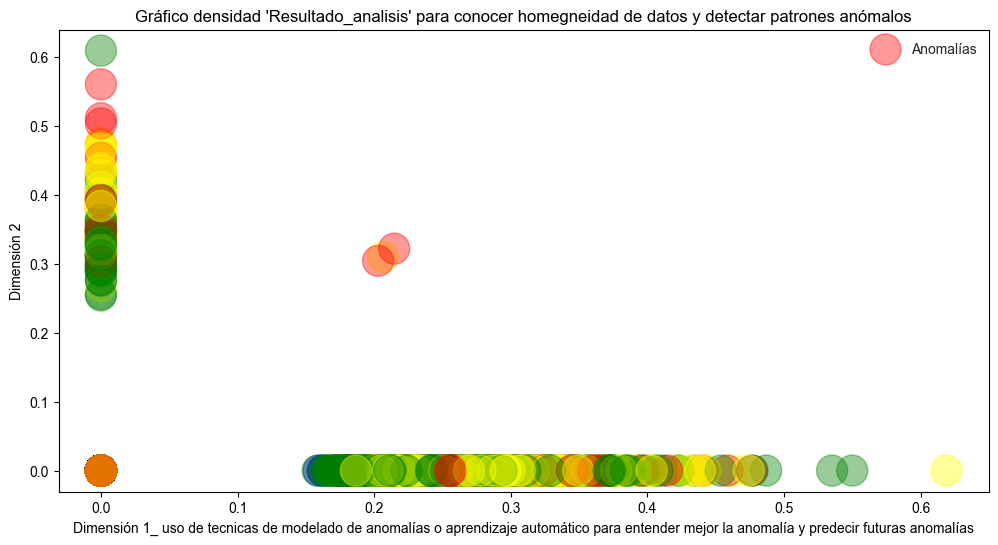

In [15]:


#funcion para reducir la dimensionalidad de un vector de tamaño 40000 a una variable que espera un vector de tamaño 1.
def reducir_dimensionalidad(X, n_columnas=2):
    # Calculamos las medias de las columnas de los datos en el eje de las filas
    medias = X.mean(axis=0)

    # Calculamos las desviaciones estándar de las columnas de los datos
    desviaciones_estandar = X.std(axis=0)

    # Normalizamos los datos, ya que al restar la media de cada columna, se centra la columna en 0, es decir la media de la columna ahora es 0 y
    # al dividir cada columna por la desviación estándar de esa columna, se obtiene que cada  columna seleccionada  tenga una varianza de 1.
    # normalizando con todo ello y todos los datos tengan la misma importancia
    X_norm = (X - medias) / desviaciones_estandar

    # Usamos la funcion de numpy argsort para seleccionar los  columnas(n_columnas) con mayor varianza, 
    #ya que Las columnas con mayor varianza son las que tienen los datos más dispersos, por lo tanto mayor cantidad de información posible.  
    columnas_seleccionadas = np.argsort(X_norm.var(axis=0))[-n_columnas:]# esto ultimo devuelve de la lista los valores de mayor varianza

    # Devolvemos las  columnas(n_columnas) seleccionadas
    return X_norm[:, columnas_seleccionadas]


# Seleccionar la columna de interés
X_norm = df_resultado['Resultado_analisis']

# Vectorizar el texto usando TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tf = vectorizer.fit_transform(X)

# Aplicar k-means para agrupar los textos
n_clusters = 5  # ajustar este valor según necesidad
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_resultado['Cluster'] = kmeans.fit_predict(X_tf)

#mapeo las etiquetas de clúster (c) para asignar  lo que espera scatter , no valores numericos sino  colores 

def colores_clusters(cluster):
    if cluster == 0:
        return "red"
    elif cluster == 1:
        return "green"
    elif cluster == 2:
        return "blue"
    else:
        return "yellow"

# convierto la matriz de características a matriz_array, por ser mas faciles de trabajar
X_tf_ndarray = X_tf.toarray()
#reduzco con la funcion numpy squeenze, la dimensión primera de una matriz, en nuestro caso (40000, dimesion) elimina dimension quedandosee con el numero de valores sólo
x_reducido = X_tf_ndarray[:, 0].squeeze()
y_reducido = X_tf_ndarray[:, 1].squeeze()

#pintamos
plt.figure(figsize=(12,6))
plt.scatter(x_reducido, y_reducido, c=[colores_clusters(cluster) for cluster in df_resultado['Cluster']], cmap='magma', alpha=0.4, s=500, label='Anomalías')
# Cambiar el color del fondo
plt.style.use('seaborn-darkgrid')
#titulo y etiqyuetas
plt.title("Gráfico densidad 'Resultado_analisis' para conocer homegneidad de datos y detectar patrones anómalos")
plt.xlabel('Dimensión 1_ uso de tecnicas de modelado de anomalías o aprendizaje automático para entender mejor la anomalía y predecir futuras anomalías')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()

 

In [15]:
df_modificado_FINAL.head(1)

,Anyo,Fecha,Hora,Hora_entera,Intervalo,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo
0,2023,2023-05-30,2023-12-25 06:33:58,6,6-9,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...


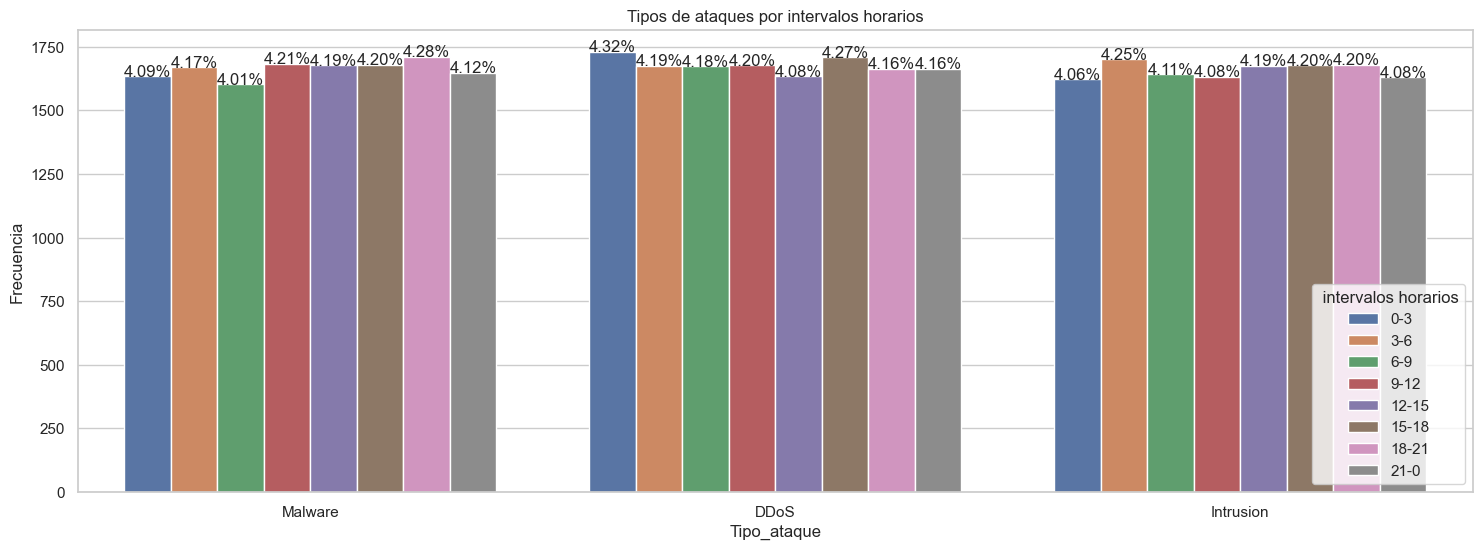

In [108]:
# Ajusta el nombre del DataFrame según tu situación

# Configuración del gráfico
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")

# Crear el gráfico de barras
ax = sns.countplot(data=df_modificado_FINAL, x='Tipo_ataque', hue='Intervalo')

# Añadir porcentajes en la parte superior de cada barra
total = float(len(df_modificado_FINAL))  # Número total de registros

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.2%}'.format(height / total),
            ha="center")
    

# Ajustes adicionales
plt.xlabel('Tipo_ataque' )
plt.ylabel('Frecuencia')
plt.title('Tipos de ataques por intervalos horarios')
plt.legend(title=' intervalos horarios',loc= 'lower right')
plt.show()

In [3]:
df_random_ori= pd.read_csv(r"D:\PARA ENTREGAR_EDA\DATASET ORIGINALES\Ransomware.CSV")

In [4]:
df_random_ori.head()

,Target,AKA,description,sector,"organisation size 1,5,10,25,100,300",revenue $USD million,cost,ransom cost,data note,ransom paid,...,revenue as of,no of employees,Data Note,Source Name,URL,URL 2,URL 3,URL 4,URL 5,#ID
0,Kaseya,NaN,NaN,tech,300,300.0,70,70.0,NaN,unknown,...,NaN,NaN,NaN,NaN,https://techcrunch.com/2021/07/05/kaseya-hack-...,NaN,NaN,NaN,NaN,359
1,Salvation Army,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.teiss.co.uk/salvation-army-ransomw...,NaN,NaN,NaN,NaN,358
2,Grupo Fleury,NaN,Brazil's largest diagnostic company,healthcare,10,686.0,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.bleepingcomputer.com/news/security...,NaN,NaN,NaN,NaN,357
3,City of Liege,NaN,NaN,government,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://securityaffairs.co/wordpress/119240/ma...,NaN,NaN,NaN,NaN,356
4,Lucky Star Casino,NaN,NaN,NaN,1,9.0,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.casino.org/news/lucky-star-casinos...,NaN,NaN,NaN,NaN,355


In [9]:
df_random= pd.read_excel(r"D:\PARA ENTREGAR_EDA\DATASETS MODIFICADOS\df_random_final.xlsx")

In [12]:
df_random.head()


,Codigo_anyo,Anyo,Mes,Objetivo,Sector,Paises,Cibergrupos_ransom
0,1,2021,JUN,Edward Don,NaN,USA,"Edward Don ""Skinners' schools"""
1,1,2021,JUN,Skinners' schools,academic,UK,ADATA
2,1,2021,MAY,AXA,finance,"Thailand, Malaysia, Honk Kong, Phillipines",Ireland HSE
3,1,2021,APR,Hoya,"healthcare, tech",Japan,The Dixie Group
4,1,2021,FEB,SN,finance,USA,Foxtons Group


In [94]:
# Agregar una columna para la cantidad total de ataques 
total_ataques = 194
df_random['Cantidad_ataques'] = total_ataques / len(df_random)

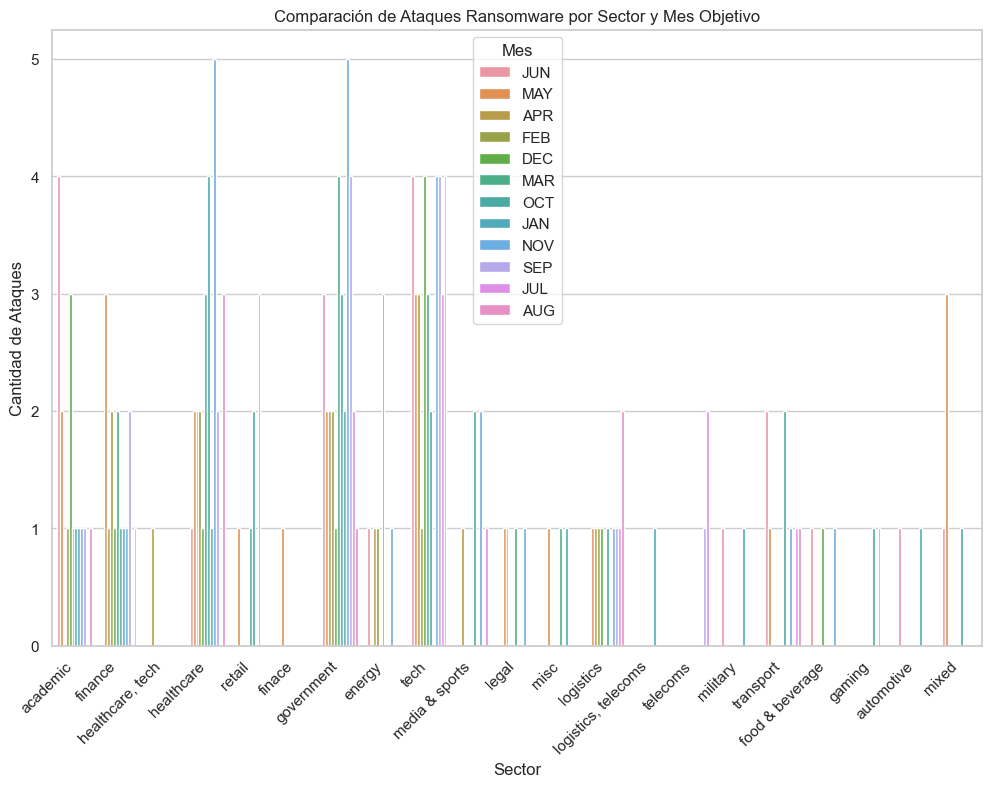

In [93]:

plt.show()

# Crear un countplot agrupado por sector
plt.figure(figsize=(12, 8))
sns.countplot(x='Sector', hue='Mes', data=df_random)
plt.title('Comparación de Ataques Ransomware por Sector y Mes Objetivo')
plt.xlabel('Sector')
plt.ylabel('Cantidad de Ataques')
plt.xticks(rotation=45, ha='right')
plt.show()



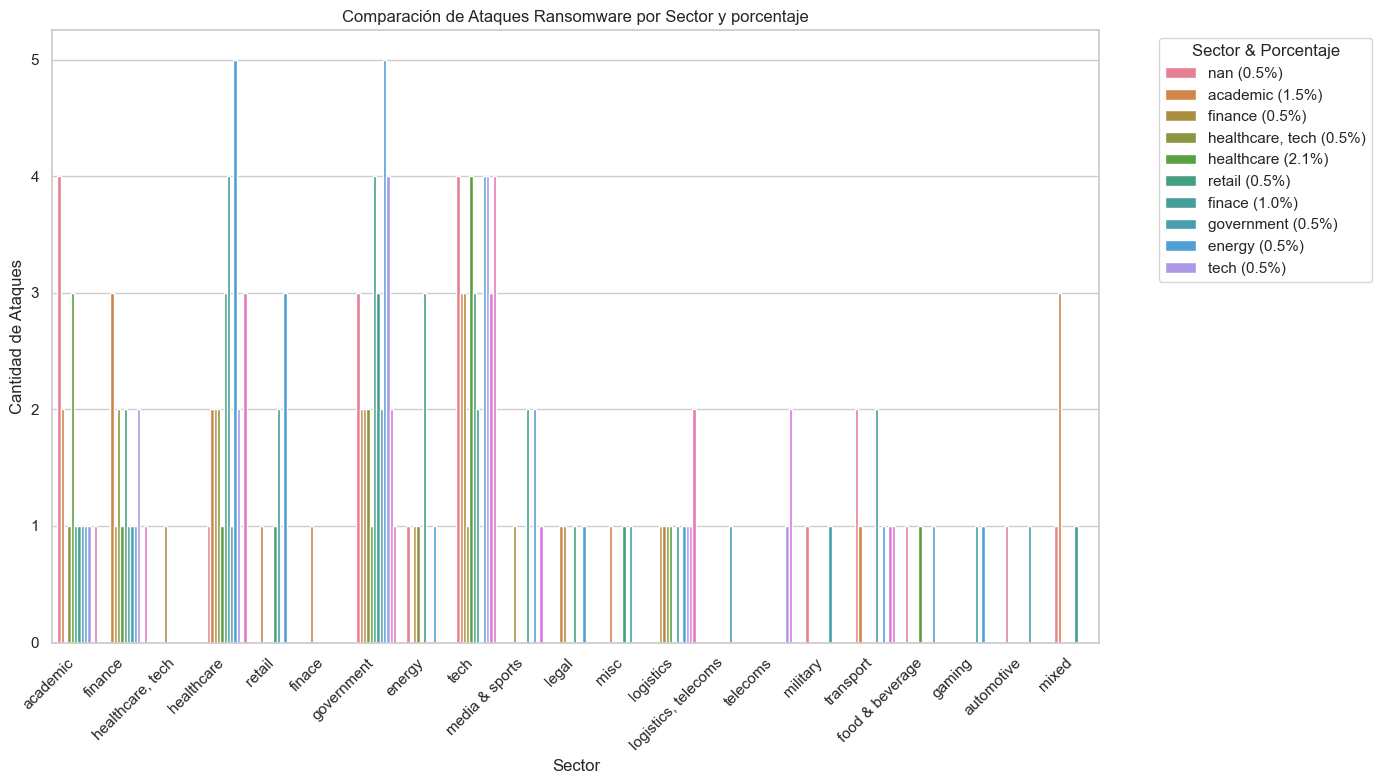

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un countplot agrupado por sector
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Sector', hue='Mes', data=df_random)

# Calcular porcentajes
total = len(df_random)  # Total de observaciones
percentages = [(count / total) for count in df_random.groupby(['Sector', 'Mes']).size()]

# Crear una leyenda personalizada con porcentajes
legend_labels = []
for sector, color, percentage in zip(df_random['Sector'].unique(), sns.color_palette(), percentages):
    legend_labels.append(f'{sector} ({percentage:.1%})')

# Añadir la leyenda personalizada
ax.legend(legend_labels, title='Sector & Porcentaje', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el título y las etiquetas de los ejes
plt.title('Comparación de Ataques Ransomware por Sector y porcentaje')
plt.xlabel('Sector')
plt.ylabel('Cantidad de Ataques')
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()



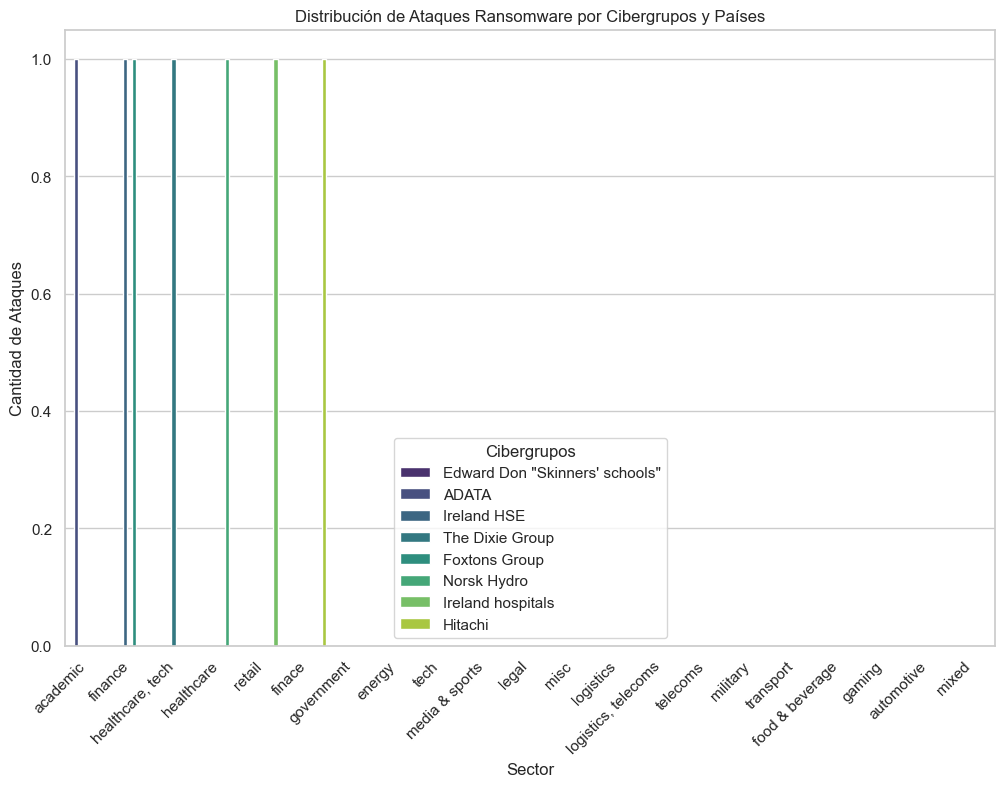

In [99]:


# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(x='Sector', y='Cantidad_ataques', hue='Cibergrupos_ransom', data=df_random, palette='viridis')

# Añadir etiquetas y título
plt.title('Distribución de Ataques Ransomware por Cibergrupos y Países')
plt.xlabel('Sector')
plt.ylabel('Cantidad de Ataques')
plt.xticks(rotation=45, ha='right')

# Mostrar la leyenda
plt.legend(title='Cibergrupos')

# Mostrar la gráfica
plt.show()